# 初探动态规划

这是一个非常好的问题！和我们刚才聊的回溯一样，动态规划（Dynamic Programming, 简称 DP）是算法学习中的另一座“大山”，而且它初学起来可能感觉更“抽象”。

你现在是初学者，**我们不谈任何复杂的术语**（比如“最优子结构”、“重叠子问题”），那些只会让你更晕。

我们只用一个比喻：**“聪明的备忘录”**。

---

### 💡 核心比喻：爬楼梯（和“备忘录”）

假设你是一个机器人，你要爬一个 10 级的楼梯。你一次只能爬 1 级或者 2 级。

**问题：** 爬到第 10 级，一共有多少种不同的爬法？

#### 1. “笨”机器人的做法 (纯递归)

这个机器人很“笨”，但他会思考：
* “我要到第 10 级，我最后一步是怎么上来的呢？”
* “我可能是从第 9 级爬了 1 级上来的。”
* “也可能是从第 8 级爬了 2 级上来的。”
* “所以，到第 10 级的总方法 = (到第 9 级的方法数) + (到第 8 级的方法数)。”
* 我们可以写一个公式：`Ways(10) = Ways(9) + Ways(8)`。

这看起来很合理！这个机器人就开始算了：
* `Ways(9) = Ways(8) + Ways(7)`
* `Ways(8) = Ways(7) + Ways(6)`
* ...

**灾难发生了：**
为了算 `Ways(10)`，他需要算 `Ways(9)` 和 `Ways(8)`。
为了算 `Ways(9)`，他又需要算 `Ways(8)` 和 `Ways(7)`。
...
`Ways(8)`、`Ways(7)`、`Ways(6)` ... 这些**相同的问题**被他**重复计算了无数次**！当楼梯很高时，他会算到“死机”。

#### 2. “聪明”机器人的做法 (动态规划)

这个机器人也很会思考，但他多了一个**“备忘录”**（一个数组或哈希表）。

他也会算 `Ways(10) = Ways(9) + Ways(8)`。
* 他去算 `Ways(9)`。
    * 他又去算 `Ways(8)`。
        * 他又去算 `Ways(7)`... 一直算到 `Ways(1)` (1种) 和 `Ways(2)` (2种)。
        * 他算出 `Ways(3) = Ways(1) + Ways(2) = 3`。
        * **关键：** 他在“备忘录”上**写下：`Ways(3) = 3`**。
        * 他算出 `Ways(4) = Ways(3) + Ways(2) = 3 + 2 = 5`。
        * **关键：** 他在“备忘录”上**写下：`Ways(4) = 5`**。
* ...
* 他一路算回了 `Ways(8)`，并在备忘录上写下了 `Ways(8)` 的答案。
* 接着，他去算 `Ways(9) = Ways(8) + Ways(7)`。他把 `Ways(8)` 的答案（已存）和 `Ways(7)` 的答案（已存）加起来，得到 `Ways(9)`，**存入备忘录**。
* 最后，他去算 `Ways(10) = Ways(9) + Ways(8)`。
* **关键：** 他需要 `Ways(9)` 和 `Ways(8)` 的答案时，他**不！会！重！新！算！**
* 他会**“查备忘录”**：“哦，`Ways(9)` 我算过了，是X。`Ways(8)` 我也算过了，是Y。答案就是 X+Y。”

---

### 🗂️ 总结：什么是动态规划？

**动态规划 (DP)** 就是这个“聪明”机器人的工作方法。

它本质上是一种**“用空间换时间”**的技巧。

它把一个“大问题”（如 `Ways(10)`）分解成一堆“小问题”（`Ways(9)`, `Ways(8)`...）。
当它发现这些“小问题”被**重复**需要时，它就会用一个**“备忘录”（`memo` 数组或 `dp` 表）**把这些小问题的答案**存起来**。

下次再遇到同一个小问题，**直接查表**，而不是重新计算。

### 🚀 动态规划的两种“姿势”

你有两种方法来使用这个“备忘录”：

1.  **带备忘录的递归 (Memoization - “自顶向下”)**
    * 这就是我们上面那个“聪明”机器人的做法。
    * “我需要 10，哦，得先算 9 和 8... 算完了记下来。”
    * 这种方法**最直观**，因为它和你最开始的“笨”递归思路几乎一样，只是加了个“备忘录” `if` 判断。

2.  **递推 (Tabulation - “自底向上”)**
    * 这是一个更“有条理”的机器人。
    * 他想：“我最终要 10，但我知道 1 和 2。我不如**从 1 开始，一步一步算出 3, 4, 5... 直到 10**。”
    * 他拿出一个表格（`dp` 数组）：
        * `dp[1] = 1`
        * `dp[2] = 2`
        * `dp[3] = dp[1] + dp[2] = 3`
        * `dp[4] = dp[2] + dp[3] = 5`
        * `dp[5] = dp[3] + dp[4] = 8`
        * ...
        * `dp[10] = dp[8] + dp[9] = ...`
    * 他从“已知”推向“未知”，**用一个 `for` 循环**就搞定了。这通常是**效率最高**的写法。

### 🔑 你什么时候该用 DP？

当你发现一个问题可以被分解，并且在分解的过程中，**有大量“重叠的子问题”**（像 `Ways(8)` 被算了N次）时，就是动态规划大显身手的时候！

一句话总结：
**动态规划 = 递归（分治） + 备忘录（解决重叠子问题）**

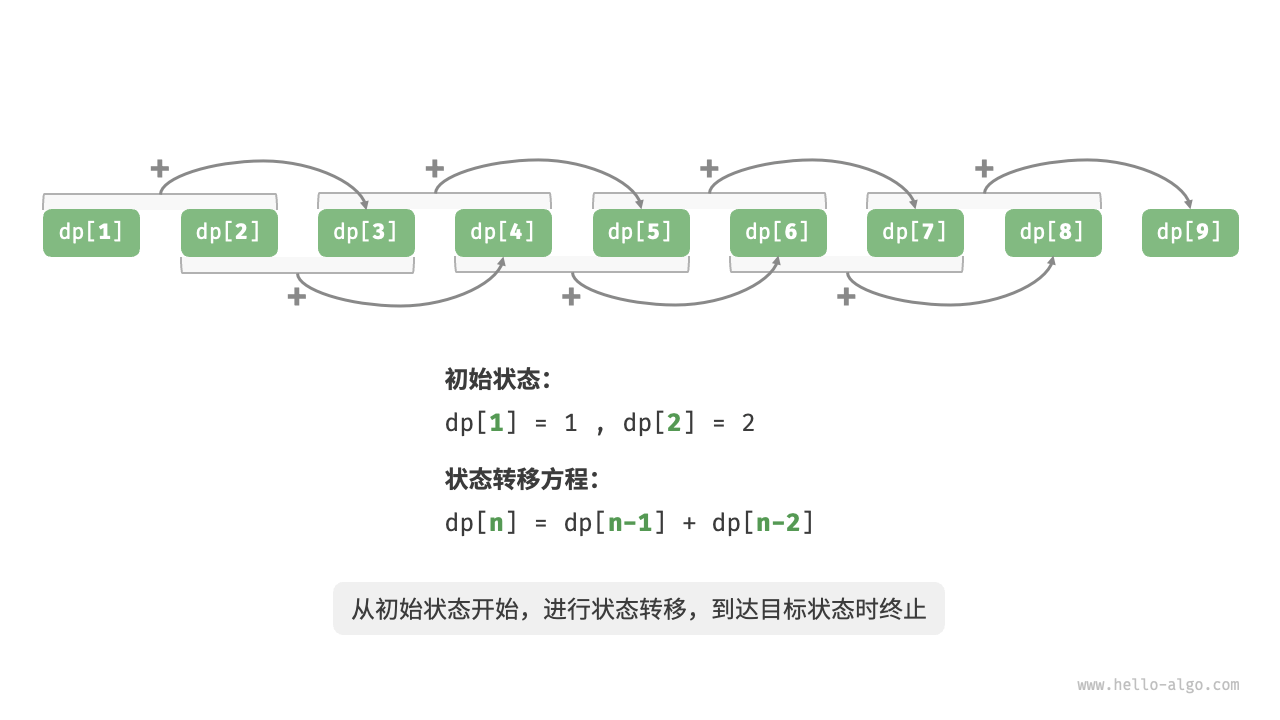

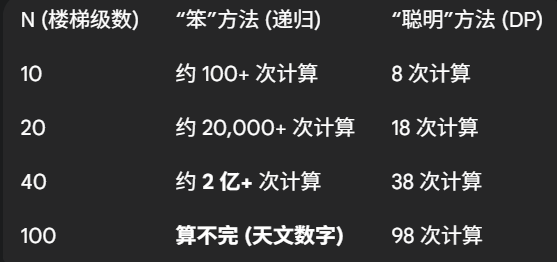


---

### 1. 重叠子问题 (Overlapping Subproblems)

* **学术黑话：** 在问题的求解过程中，很多子问题的解被重复计算。
* **大白话翻译：** “**同一个小问题，你算了不止一遍**！”
* **我们的例子：** 爬楼梯 `Ways(10)`
    * 为了算 `Ways(10)`，你需要 `Ways(8)`。
    * 为了算 `Ways(9)`，你**又**需要 `Ways(8)`。
    * 这个被你**反复**拿来算的 `Ways(8)`，就是“重叠子问题”。
* **DP 的对策：** “做个备忘录！”
    * 第一次算出 `Ways(8)` 时，赶紧记在 `dp[8]` 里。
    * 下次再要 `Ways(8)`，不许算，直接查表！

---

### 2. 最优子结构 (Optimal Substructure)

* **学术黑话：** 一个大问题的“最优解”，可以由它所有“子问题”的“最优解”推导出来。
* **大白话翻译：** “**你大目标的‘最好’，一定是由你小目标的‘最好’组成的。**”
* **换个例子：** 找“最短路径”
    * 假设你要找从你家（A）到学校（C）的**最短**路径，并且你必须经过一家超市（B）。
    * 你的“最优子结构”就是：
        1.  你找到的 A 到 B 的路径，**必须**是 A 到 B 的**最短**路径。
        2.  你找到的 B 到 C 的路径，**必须**是 B 到 C 的**最短**路径。
    * 你的“大最优”（A到C最短） = “小最优1”（A到B最短） + “小最优2”（B到C最短）。
* **为什么这很重要？**
    * 这保证了你可以“从小往大”推。如果你可以先浪一段远路（A到B不是最短），再指望后面抄近道来获得“全局最短”，那 DP 就没法用了。
    * **爬楼梯问题也一样：** “到第10级的方法数” = “到第9级的方法数” + “到第8级的方法数”。“大问题的解”可以由“小问题的解”**直接推出来**。

---

### 3. 无后效性 (No Aftereffect / Memorylessness)

* **学术黑话：** 某阶段的状态一旦确定，就不受后续阶段决策的影响。
* **大白话翻译：** “**只看结果，不问过往。**”
* **我们的例子：** 爬楼梯 `dp[i] = dp[i-1] + dp[i-2]`
    * 假设你正在算 `dp[5]` (到第5级的方法)。
    * 你需要 `dp[4]` (比如是 5 种) 和 `dp[3]` (比如是 3 种)。
    * `dp[5] = 5 + 3 = 8`。
    * **“无后效性”体现在：**
        * 当你用 `dp[4]` 的那个“5”时，你**毫不在乎**这 5 种方法具体是怎么走的 (是 1+1+1+1, 还是 1+2+1, 还是 2+1+1...)。
        * 你**未来的决策**（算`dp[5]`），只取决于 `dp[4]` 的**结果**（那个数字 `5`），而不取决于 `dp[4]` 的**过程**（那 5 种走法）。
* **为什么这很重要？**
    * 这保证了你的“备忘录”是**可靠的、不变的**。
    * 如果你后面的决策（比如你算 `dp[7]` 时）会“穿越”回来，改变 `dp[4]` 的值，那整个“备忘录”就全乱套了。
    * “无后效性”就是保证了 `dp[4]` 算出来是 5，它就**永远是 5**。

---

### 总结

这三个词就是动态规划的“准入标准”：

1.  **重叠子问题**：告诉我们“**值得用**” DP（不然用普通递归就行了）。
2.  **最优子结构**：告诉我们“**可以**”用 DP（大问题能从小问题推导）。
3.  **无后效性**：告诉我们“**怎么用**” DP（可以放心地用 `dp[i-1]` 去算 `dp[i]`）。

所以，我们的“爬楼梯”问题，完美地符合这三条：
1.  有 `Ways(8)` 这样的**重叠子问题**。
2.  有 `Ways(10) = Ways(9) + Ways(8)` 这样的**最优子结构**（这里是“总和”，不是“最优”，但结构是一样的）。
3.  有 `dp[i]` 只看 `dp[i-1]` 的结果，不看过程的**无后效性**。

因此，它是一个**完美**的动态规划问题。
